# Binding prediction

In this notebook we preforms various machine learning methods and compare various aspects of machine learning paradigms:

* Zero-knowledge vs. domain-knowledge based prediction
* Single algorithms vs. ensemble methods
* Normalized vs. non-normalized space

We also reviewed several machine learning algorithms such as Support Vector Machine including its variants (c-SVN, regressive SVN etc) and tree based methods (decision tree, random forest, extremely random forest etc)

In [1]:
## matrix and vector tools

import pandas as pd
from pandas import DataFrame as df
from pandas import Series
import numpy as np

In [181]:
## sklearn

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.feature_selection import VarianceThreshold

In [3]:
# matplotlib et al.

from matplotlib import pyplot as plt

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Data Import and pre-processing

In [96]:
dna = df.from_csv('../../data/training_data_binding_site_prediction/dna_big.csv')

In [97]:
## embed class

dna = dna.reset_index(drop=False)
dna['class_bool'] = dna['class'] == '+'
dna['class_num'] = dna.class_bool.apply(lambda x: 1 if x else 0)

In [98]:
## added protein ID and corresponding position

dna['ID'] = dna.ID_pos.apply(lambda x: ''.join(x.split('_')[:-1]))
dna['pos'] = dna.ID_pos.apply(lambda x: x.split('_')[-1])

In [99]:
## data columns

dna.columns

Index([u'ID_pos', u'-2_A_pssm', u'-2_R_pssm', u'-2_N_pssm', u'-2_D_pssm',
       u'-2_C_pssm', u'-2_Q_pssm', u'-2_E_pssm', u'-2_G_pssm', u'-2_H_pssm',
       ...
       u'intermediate_composition3', u'buried_composition1',
       u'buried_composition2', u'buried_composition3', u'fold', u'class',
       u'class_bool', u'class_num', u'ID', u'pos'],
      dtype='object', length=524)

In [8]:
## print available features
for feature in dna.columns[:-6]:
    
    print feature

ID_pos
-2_A_pssm
-2_R_pssm
-2_N_pssm
-2_D_pssm
-2_C_pssm
-2_Q_pssm
-2_E_pssm
-2_G_pssm
-2_H_pssm
-2_I_pssm
-2_L_pssm
-2_K_pssm
-2_M_pssm
-2_F_pssm
-2_P_pssm
-2_S_pssm
-2_T_pssm
-2_W_pssm
-2_Y_pssm
-2_V_pssm
-1_A_pssm
-1_R_pssm
-1_N_pssm
-1_D_pssm
-1_C_pssm
-1_Q_pssm
-1_E_pssm
-1_G_pssm
-1_H_pssm
-1_I_pssm
-1_L_pssm
-1_K_pssm
-1_M_pssm
-1_F_pssm
-1_P_pssm
-1_S_pssm
-1_T_pssm
-1_W_pssm
-1_Y_pssm
-1_V_pssm
0_A_pssm
0_R_pssm
0_N_pssm
0_D_pssm
0_C_pssm
0_Q_pssm
0_E_pssm
0_G_pssm
0_H_pssm
0_I_pssm
0_L_pssm
0_K_pssm
0_M_pssm
0_F_pssm
0_P_pssm
0_S_pssm
0_T_pssm
0_W_pssm
0_Y_pssm
0_V_pssm
1_A_pssm
1_R_pssm
1_N_pssm
1_D_pssm
1_C_pssm
1_Q_pssm
1_E_pssm
1_G_pssm
1_H_pssm
1_I_pssm
1_L_pssm
1_K_pssm
1_M_pssm
1_F_pssm
1_P_pssm
1_S_pssm
1_T_pssm
1_W_pssm
1_Y_pssm
1_V_pssm
2_A_pssm
2_R_pssm
2_N_pssm
2_D_pssm
2_C_pssm
2_Q_pssm
2_E_pssm
2_G_pssm
2_H_pssm
2_I_pssm
2_L_pssm
2_K_pssm
2_M_pssm
2_F_pssm
2_P_pssm
2_S_pssm
2_T_pssm
2_W_pssm
2_Y_pssm
2_V_pssm
-2_A_perc
-2_R_perc
-2_N_perc
-2_D_perc
-2_C_perc
-2_

In [152]:
dna

,ID_pos,-2_A_pssm,-2_R_pssm,-2_N_pssm,-2_D_pssm,-2_C_pssm,-2_Q_pssm,-2_E_pssm,-2_G_pssm,-2_H_pssm,...,intermediate_composition3,buried_composition1,buried_composition2,buried_composition3,fold,class,class_bool,class_num,ID,pos
0,Q6NS38_1,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.0,1.0,0.5,0.0,2,-,False,0,Q6NS38,1
1,Q6NS38_2,0.047426,0.017986,0.006693,0.002473,0.017986,0.047426,0.006693,0.006693,0.017986,...,0.0,1.0,0.5,0.0,2,-,False,0,Q6NS38,2
2,Q6NS38_3,0.119203,0.017986,0.119203,0.999665,0.002473,0.047426,0.731059,0.017986,0.017986,...,0.0,1.0,0.5,0.0,2,-,False,0,Q6NS38,3
3,Q6NS38_4,0.731059,0.997527,0.119203,0.268941,0.006693,0.731059,0.119203,0.119203,0.500000,...,0.0,1.0,0.5,0.0,2,-,False,0,Q6NS38,4
4,Q6NS38_5,0.731059,0.268941,0.119203,0.006693,0.017986,0.268941,0.268941,0.047426,0.047426,...,0.0,1.0,0.5,0.0,2,-,False,0,Q6NS38,5
5,Q6NS38_6,0.119203,0.880797,0.017986,0.017986,0.047426,0.047426,0.268941,0.119203,0.017986,...,0.0,1.0,0.5,0.0,2,-,False,0,Q6NS38,6
6,Q6NS38_7,0.731059,0.119203,0.119203,0.119203,0.047426,0.119203,0.017986,0.017986,0.017986,...,0.0,1.0,0.5,0.0,2,-,False,0,Q6NS38,7
7,Q6NS38_8,0.119203,0.880797,0.119203,0.119203,0.268941,0.982014,0.268941,0.119203,0.268941,...,0.0,1.0,0.5,0.0,2,-,False,0,Q6NS38,8
8,Q6NS38_9,0.500000,0.982014,0.119203,0.119203,0.006693,0.268941,0.268941,0.952574,0.017986,...,0.0,1.0,0.5,0.0,2,-,False,0,Q6NS38,9
9,Q6NS38_10,0.982014,0.268941,0.017986,0.500000,0.017986,0.047426,0.268941,0.047426,0.047426,...,0.0,1.0,0.5,0.0,2,-,False,0,Q6NS38,10


## Data Pre-processing: normalization

We apply Student's t normalization on each column:

$$X' = \frac{X - \hat{X}}{s}$$

This set would be used in parallel to normal dataset for comparison

In [95]:
## create column-wise normalized data-set

dna_norm = dna.copy()

for col in dna_norm[dna_norm.columns[1:][:-6]].columns:
    dna_norm[col] = (dna_norm[col] - dna_norm[col].mean()) / (dna_norm[col].std() + .00001)

In [153]:
dna_norm

,ID_pos,-2_A_pssm,-2_R_pssm,-2_N_pssm,-2_D_pssm,-2_C_pssm,-2_Q_pssm,-2_E_pssm,-2_G_pssm,-2_H_pssm,...,intermediate_composition3,buried_composition1,buried_composition2,buried_composition3,fold,class,class_bool,class_num,ID,pos
0,Q6NS38_1,0.471432,0.333399,0.356656,0.424321,0.536658,0.167189,0.331158,0.821829,0.114952,...,-0.396931,0.638864,0.573303,-0.124084,2,-,False,0,Q6NS38,1
1,Q6NS38_2,-1.263070,-1.249199,-1.354682,-1.189555,-0.911272,-1.383960,-1.273175,-0.970122,-1.344461,...,-0.396931,0.638864,0.573303,-0.124084,2,-,False,0,Q6NS38,2
2,Q6NS38_3,-0.987983,-1.249199,-0.964372,2.045131,-0.957874,-1.383960,1.082607,-0.929099,-1.344461,...,-0.396931,0.638864,0.573303,-0.124084,2,-,False,0,Q6NS38,3
3,Q6NS38_4,1.356970,1.966934,-0.964372,-0.325185,-0.945197,0.959118,-0.907270,-0.561426,0.114952,...,-0.396931,0.638864,0.573303,-0.124084,2,-,False,0,Q6NS38,4
4,Q6NS38_5,1.356970,-0.425236,-0.964372,-1.175865,-0.911272,-0.624740,-0.420290,-0.822158,-1.255325,...,-0.396931,0.638864,0.573303,-0.124084,2,-,False,0,Q6NS38,5
5,Q6NS38_6,-0.987983,1.583672,-1.315504,-1.139232,-0.822838,-1.383960,-0.420290,-0.561426,-1.344461,...,-0.396931,0.638864,0.573303,-0.124084,2,-,False,0,Q6NS38,6
6,Q6NS38_7,1.356970,-0.916874,-0.964372,-0.810906,-0.822838,-1.137952,-1.236446,-0.929099,-1.344461,...,-0.396931,0.638864,0.573303,-0.124084,2,-,False,0,Q6NS38,7
7,Q6NS38_8,-0.987983,1.583672,-0.964372,-0.810906,-0.157423,1.819240,-0.420290,-0.561426,-0.584634,...,-0.396931,0.638864,0.573303,-0.124084,2,-,False,0,Q6NS38,8
8,Q6NS38_9,0.471432,1.915998,-0.964372,-0.810906,-0.945197,-0.624740,-0.420290,2.465816,-1.344461,...,-0.396931,0.638864,0.573303,-0.124084,2,-,False,0,Q6NS38,9
9,Q6NS38_10,2.318762,-0.425236,-1.315504,0.424321,-0.911272,-1.383960,-0.420290,-0.822158,-1.255325,...,-0.396931,0.638864,0.573303,-0.124084,2,-,False,0,Q6NS38,10


# Analysis I: Measuring the variation of significance among PSSM features

We want to see whether certain evolution patterns have any influence on DNA binding mechanism. We apply **Recursive Feature Elimination (RFE)** to rank our all PSSM-based features according to their predictive power using **linear SVM** (that is, SVM with linear kernel function).

### Reference:

* Guyon, I., Weston, J., Barnhill, S., & Vapnik, V., “Gene selection for cancer classification using support vector machines”, Mach. Learn., 46(1-3), 389–422, 2002.

In [10]:
# extract dataset and prediction
X = dna[dna.columns[1:][:-6]]
X = X[[x for x in X.columns.tolist() if 'pssm' in x]]
X = X.iloc[range(1000)]
y = dna['class_bool']
y = y[range(1000)]

# apply RFE on linear c-SVM
estimator = SVC(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)

print selector.ranking_

[ 5 36 72 79 57 41 49 61 65 64 76 40 44 33 95 78 69 51 68 48 26 82 86 38 35
  8 55 52 43  1  1  2  3 39 28 96 37 93 77  1 15 89 46 10 12 19 25 75 24 14
 67 30 23 32 74 94 17 21 66 34  9 22 85 84 80 20 45 31 47 13 88 73 11 81 54
 58 27 90 62  6 91 59 63 56 50  7  1 83 92  4 29 42 16 87 18 70 71 53 60  1]


In [11]:
# redid previous routine on the whole data

pssm_rank = pd.DataFrame()
cat = dna['class']

for i in range(dna.index.size / 1000):
    
    this_cat = cat[range(i * 1000, (i + 1) * 1000)]
    if this_cat.unique().size > 1:
    
        X = dna[dna.columns[1:][:-6]]
        X = X[[c for c in X.columns.tolist() if 'pssm' in c]]
        X = X.iloc[range(i * 1000, (i + 1) * 1000)]
        y = dna['class_bool']
        y = y[range(i * 1000, (i + 1) * 1000)]

        estimator = SVC(kernel="linear")
        selector = RFE(estimator, 5, step=1)
        selector = selector.fit(X, y)
        print selector.ranking_
    
        pssm_rank[str(i)] = selector.ranking_
    
pssm_rank.index = [c for c in X.columns.tolist() if 'pssm' in c]

[ 5 36 72 79 57 41 49 61 65 64 76 40 44 33 95 78 69 51 68 48 26 82 86 38 35
  8 55 52 43  1  1  2  3 39 28 96 37 93 77  1 15 89 46 10 12 19 25 75 24 14
 67 30 23 32 74 94 17 21 66 34  9 22 85 84 80 20 45 31 47 13 88 73 11 81 54
 58 27 90 62  6 91 59 63 56 50  7  1 83 92  4 29 42 16 87 18 70 71 53 60  1]
[59  9 48  7 65 33  4 15 76 49 14 13 64 51 19 28 31 45 95 11 55 82  6  2 66
 17 32 84 61 56 10 86 91 68 29 57 36 26 78 60 22 93 85 38 92 43 39 21 46 35
  1 37  5 70 52  3  8 83 88 41 23 54 12 20 90 94 77 47 30  1 18 62 75 79 71
 25 72 69 81  1 53 34 24 67 50 96 58 80 27  1 40 89 44 63 42 16 74 73 87  1]
[26 67  2  1 60 56  8 72 22 25  7 23 81 34 70 24 71 38 93 88 69 42 28 78 61
 85 27 39 76 57 18 91 36 84 16 94 83 35 58 54 66 30 95 86 65 48  4  1 10 49
 59 45 79 41  1 75 33  1  9 29 17 12 37 63 89 47  3 14 53 74 43 13 50 46 52
 19 96 68 77 11  5 80 55 21 82 90 20  1 51 73 62 15 64 40 44  6 87 31 92 32]
[53 50 38 24 73 58  1 52 49 36 23 92  8 69 74 87 65 18 14 35 10 17 42 86 33
 71 68 41

In [12]:
##sort PSSM features by its predictive power

rank_av = [np.mean(pssm_rank.ix[i]) for i in pssm_rank.index]
arg_rank_av = np.argsort(rank_av)
pssm_rank_sorted = pssm_rank.ix[pssm_rank.index[arg_rank_av]]
pssm_rank_sorted['RANK_AV'] = np.sort(rank_av)

In [13]:
pssm_rank_sorted

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,RANK_AV
-1_E_pssm,55,32,27,68,82,4,28,12,56,2,...,1,29,1,10,1,3,1,1,34,21.369048
-1_L_pssm,1,10,18,4,11,93,1,96,32,1,...,2,9,1,54,31,4,2,49,17,24.119048
-1_A_pssm,26,55,69,10,20,5,20,52,62,42,...,56,1,11,42,35,25,3,13,20,29.714286
-2_E_pssm,49,4,8,1,62,1,10,1,38,5,...,8,95,5,1,30,16,17,82,15,30.500000
0_E_pssm,25,39,4,2,35,11,39,29,71,10,...,1,78,12,9,12,8,12,36,12,33.642857
-1_D_pssm,38,2,78,86,14,73,6,59,57,23,...,37,21,15,46,14,20,56,23,1,35.083333
-1_R_pssm,82,82,42,17,76,25,90,78,24,77,...,85,4,50,41,21,5,1,90,88,35.440476
-2_L_pssm,76,14,7,23,87,89,27,80,61,3,...,7,1,14,58,70,26,13,3,14,36.988095
-1_Q_pssm,8,17,85,71,89,42,32,1,2,47,...,10,1,6,80,82,77,66,31,81,37.190476
-1_K_pssm,2,86,91,16,16,9,5,9,1,1,...,3,1,3,71,48,94,64,51,72,37.428571


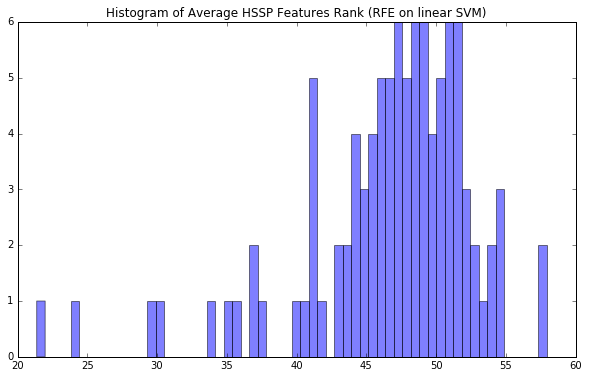

In [14]:
# plot average rank of all HSSP values

plt.hist([np.mean(pssm_rank.ix[i]) for i in pssm_rank.index], bins=60, alpha=.5)
plt.title("Histogram of Average HSSP Features Rank (RFE on linear SVM)")
fig = plt.gcf()
fig.set_size_inches(10, 6)

Some PSSM shows deviation from expected normal distribution -- which should be the case in neutral information setting due to **Central Limit Theorem (CLT)**.

# Analysis II: Support Vector Machine

We use c-SVM on two models :

* all features model
* handpicked features model

### Reference
* “Support-vector networks”, C. Cortes, V. Vapnik - Machine Learning, 20, 273-297 (1995).
* “Automatic Capacity Tuning of Very Large VC-dimension Classifiers”, I. Guyon, B. Boser, V. Vapnik - Advances in neural information processing 1993.

## SVM on all features

### Without Normalization

In [102]:
X = dna[dna.columns[1:][:-6]]
y = dna.class_num

In [103]:
## train c-SVM

clf_svm1 = SVC(kernel='rbf', C=0.7)
clf_svm1.fit(X[dna.fold == 0], y[dna.fold == 0])

SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [104]:
## predict class

pred = clf_svm1.predict(dna[dna.fold == 1][dna.columns[1:][:-6]])

In [105]:
truth = dna[dna.fold == 1]['class_num']

tp = pred[(np.array(pred) == 1) & (np.array(truth) == 1)].size
tn = pred[(np.array(pred) == 0) & (np.array(truth) == 0)].size
fp = pred[(np.array(pred) == 1) & (np.array(truth) == 0)].size
fn = pred[(np.array(pred) == 0) & (np.array(truth) == 1)].size


cm = "Confusion Matrix:\n\tX\t\t(+)-pred\t(-)-pred\n" +\
            "\t(+)-truth\t%d\t\t%d\n" +\
            "\t(-)-truth\t%d\t\t%d"
    
print cm % (tp, fn, fp, tn)

Confusion Matrix:
	X		(+)-pred	(-)-pred
	(+)-truth	0		2561
	(-)-truth	0		26832


In [165]:
print "Size of (-)- and (+)-sets:\n\t(+)\t %d\n\t(-)\t%d" % (truth[truth == 1].index.size, truth[truth == 0].index.size)

Size of (-)- and (+)-sets:
	(+)	 2561
	(-)	26832


### With normalization

In [80]:
X_norm = dna_norm[dna_norm.columns[1:][:-6]]
y = dna_norm.class_num

In [81]:
## train c-SVM

clf_svm2 = SVC(kernel='rbf', C=0.7)
clf_svm2.fit(X_norm[dna_norm.fold == 0], y[dna_norm.fold == 0])

SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [108]:
## predict class

pred2 = clf_svm2.predict(dna_norm[dna_norm.fold == 1][dna_norm.columns[1:][:-6]])

In [109]:
truth = dna_norm[dna_norm.fold == 1]['class_num']

tp = pred2[(np.array(pred2) == 1) & (np.array(truth) == 1)].size
tn = pred2[(np.array(pred2) == 0) & (np.array(truth) == 0)].size
fp = pred2[(np.array(pred2) == 1) & (np.array(truth) == 0)].size
fn = pred2[(np.array(pred2) == 0) & (np.array(truth) == 1)].size

cm = "Confusion Matrix:\n\tX\t\t(+)-pred\t(-)-pred\n" +\
            "\t(+)-truth\t%d\t\t%d\n" +\
            "\t(-)-truth\t%d\t\t%d"
    
print cm % (tp, fn, fp, tn)

Confusion Matrix:
	X		(+)-pred	(-)-pred
	(+)-truth	323		2238
	(-)-truth	156		26676


Normalization over each feature space reduces the complexity of the problem which in turn improves the result.

## SVM on PSSM + other putative useful features

We now test the performance on SVM using non-zero knowledge approach. We scourged through the complete list of features acquired by PredictProtein and include features that might have certain influence on DNA/RNA binding

In [88]:
## hand-pick features

features = [x for x in dna.columns[1:][:-6] if 'pssm' in x] +\
            [x for x in dna.columns[1:][:-6] if 'glbl_aa_comp' in x] +\
            [x for x in dna.columns[1:][:-6] if 'glbl_sec' in x] +\
            [x for x in dna.columns[1:][:-6] if 'glbl_acc' in x] +\
            [x for x in dna.columns[1:][:-6] if 'chemprop_mass' in x] +\
            [x for x in dna.columns[1:][:-6] if 'chemprop_hyd' in x] +\
            [x for x in dna.columns[1:][:-6] if 'chemprop_cbeta' in x] +\
            [x for x in dna.columns[1:][:-6] if 'chemprop_charge' in x] +\
            [x for x in dna.columns[1:][:-6] if 'inf_PP' in x] +\
            [x for x in dna.columns[1:][:-6] if 'isis_bin' in x] +\
            [x for x in dna.columns[1:][:-6] if 'isis_raw' in x] +\
            [x for x in dna.columns[1:][:-6] if 'profbval_raw' in x] +\
            [x for x in dna.columns[1:][:-6] if 'profphd_sec_raw' in x] +\
            [x for x in dna.columns[1:][:-6] if 'profphd_sec_bin' in x] +\
            [x for x in dna.columns[1:][:-6] if 'profphd_acc_bin' in x] +\
            [x for x in dna.columns[1:][:-6] if 'profphd_normalize' in x] +\
            [x for x in dna.columns[1:][:-6] if 'pfam_within_domain' in x] +\
            [x for x in dna.columns[1:][:-6] if 'pfam_dom_cons' in x]

In [89]:
X_norm = dna_norm[features]
y = dna_norm.class_num

In [90]:
## train c-SVM

clf_svm3 = SVC(kernel='rbf', C=0.7)
clf_svm3.fit(X_norm[dna_norm.fold == 0], y[dna_norm.fold == 0])

SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
## predict class

pred3 = clf_svm3.predict(X_norm[dna_norm.fold == 1])

In [107]:
truth = dna_norm[dna_norm.fold == 1]['class_num']

tp = pred3[(np.array(pred3) == 1) & (np.array(truth) == 1)].size
tn = pred3[(np.array(pred3) == 0) & (np.array(truth) == 0)].size
fp = pred3[(np.array(pred3) == 1) & (np.array(truth) == 0)].size
fn = pred3[(np.array(pred3) == 0) & (np.array(truth) == 1)].size

cm = "Confusion Matrix:\n\tX\t\t(+)-pred\t(-)-pred\n" +\
            "\t(+)-truth\t%d\t\t%d\n" +\
            "\t(-)-truth\t%d\t\t%d"
    
print cm % (tp, fn, fp, tn)

Confusion Matrix:
	X		(+)-pred	(-)-pred
	(+)-truth	166		2395
	(-)-truth	99		26733


# Analysis III: Tree-based Classificators

We picked three tree-based algorithms: Decision Tree (DT), Random Forest (RT) and Extremely Random Forest (ERT). From left to right, the algorithm allows more complexity into the models by introducing more randomness and biased than the previous algorithm.

In [111]:
X = dna[dna.columns[1:][:-6]]
y = dna.class_num

## Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

### Reference
L. Breiman, J. Friedman, R. Olshen, and C. Stone. Classification and Regression Trees. Wadsworth, Belmont, CA, 1984.

In [151]:
# compute cross validated accuracy of the model

clf_t1 = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
                             random_state=0)

scores = cross_val_score(clf_t1, X, y, cv=5)

print scores
print scores.mean()                             

[ 0.84656239  0.84001634  0.85005545  0.86370535  0.85284847]
0.850637599853


In [116]:
clf_t1.fit(X[dna.fold == 0], y[dna.fold == 0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [119]:
pred_t1 = clf_t1.predict(X[dna.fold == 1])

In [126]:
truth = dna[dna.fold == 1]['class_num']

tp = pred_t1[(np.array(pred_t1) == 1) & (np.array(truth) == 1)].size
tn = pred_t1[(np.array(pred_t1) == 0) & (np.array(truth) == 0)].size
fp = pred_t1[(np.array(pred_t1) == 1) & (np.array(truth) == 0)].size
fn = pred_t1[(np.array(pred_t1) == 0) & (np.array(truth) == 1)].size

cm = "Confusion Matrix:\n\tX\t\t(+)-pred\t(-)-pred\n" +\
            "\t(+)-truth\t%d\t\t%d\n" +\
            "\t(-)-truth\t%d\t\t%d"
    
print cm % (tp, fn, fp, tn)

Confusion Matrix:
	X		(+)-pred	(-)-pred
	(+)-truth	760		1801
	(-)-truth	3237		23595


## Random Forest

In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, the bias of the forest usually slightly increases (with respect to the bias of a single non-random tree) but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model.

[SKL]

### Reference:

* Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.
* Breiman, “Arcing Classifiers”, Annals of Statistics 1998.


In [149]:
# compute cross validated accuracy of the model

clf_t2 = RandomForestClassifier(n_estimators=10, max_depth=None,
                                 min_samples_split=2, random_state=0)
scores = cross_val_score(clf_t2, X, y, cv=5)
print scores
print scores.mean()

[ 0.90253298  0.9058542   0.90632113  0.90917581  0.908417  ]
0.90646022366


In [128]:
clf_t2.fit(X[dna.fold == 0], y[dna.fold == 0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [130]:
pred_t2 = clf_t2.predict(X[dna.fold == 1])

In [131]:
truth = dna[dna.fold == 1]['class_num']

tp = pred_t2[(np.array(pred_t2) == 1) & (np.array(truth) == 1)].size
tn = pred_t2[(np.array(pred_t2) == 0) & (np.array(truth) == 0)].size
fp = pred_t2[(np.array(pred_t2) == 1) & (np.array(truth) == 0)].size
fn = pred_t2[(np.array(pred_t2) == 0) & (np.array(truth) == 1)].size

cm = "Confusion Matrix:\n\tX\t\t(+)-pred\t(-)-pred\n" +\
            "\t(+)-truth\t%d\t\t%d\n" +\
            "\t(-)-truth\t%d\t\t%d"
    
print cm % (tp, fn, fp, tn)

Confusion Matrix:
	X		(+)-pred	(-)-pred
	(+)-truth	245		2316
	(-)-truth	224		26608


## Extremely Randomized Tree

In extremely randomized trees (see ExtraTreesClassifier and ExtraTreesRegressor classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:

[SKL]

### Reference:

* P. Geurts, D. Ernst., and L. Wehenkel, “Extremely randomized trees”, Machine Learning, 63(1), 3-42, 2006.

In [150]:
# compute cross validated accuracy of the model

clf_t3 = ExtraTreesClassifier(n_estimators=10, max_depth=None,
                              min_samples_split=2, random_state=0)
scores = cross_val_score(clf_t3, X, y, cv=5)

print scores
print scores.mean()

[ 0.90480915  0.90813051  0.90859744  0.90835863  0.91028485]
0.9080361155


In [134]:
clf_t3.fit(X[dna.fold == 0], y[dna.fold == 0])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [135]:
pred_t3 = clf_t3.predict(X[dna.fold == 1])

In [136]:
truth = dna[dna.fold == 1]['class_num']

tp = pred_t3[(np.array(pred_t3) == 1) & (np.array(truth) == 1)].size
tn = pred_t3[(np.array(pred_t3) == 0) & (np.array(truth) == 0)].size
fp = pred_t3[(np.array(pred_t3) == 1) & (np.array(truth) == 0)].size
fn = pred_t3[(np.array(pred_t3) == 0) & (np.array(truth) == 1)].size

cm = "Confusion Matrix:\n\tX\t\t(+)-pred\t(-)-pred\n" +\
            "\t(+)-truth\t%d\t\t%d\n" +\
            "\t(-)-truth\t%d\t\t%d"
    
print cm % (tp, fn, fp, tn)

Confusion Matrix:
	X		(+)-pred	(-)-pred
	(+)-truth	233		2328
	(-)-truth	236		26596


## Random Forest on selected features

In [172]:
features = [x for x in dna.columns[1:][:-6] if 'pssm' in x] +\
            [x for x in dna.columns[1:][:-6] if 'glbl_aa_comp' in x] +\
            [x for x in dna.columns[1:][:-6] if 'glbl_sec' in x] +\
            [x for x in dna.columns[1:][:-6] if 'glbl_acc' in x] +\
            [x for x in dna.columns[1:][:-6] if 'chemprop_mass' in x] +\
            [x for x in dna.columns[1:][:-6] if 'chemprop_hyd' in x] +\
            [x for x in dna.columns[1:][:-6] if 'chemprop_cbeta' in x] +\
            [x for x in dna.columns[1:][:-6] if 'chemprop_charge' in x] +\
            [x for x in dna.columns[1:][:-6] if 'inf_PP' in x] +\
            [x for x in dna.columns[1:][:-6] if 'isis_bin' in x] +\
            [x for x in dna.columns[1:][:-6] if 'isis_raw' in x] +\
            [x for x in dna.columns[1:][:-6] if 'profbval_raw' in x] +\
            [x for x in dna.columns[1:][:-6] if 'profphd_sec_raw' in x] +\
            [x for x in dna.columns[1:][:-6] if 'profphd_sec_bin' in x] +\
            [x for x in dna.columns[1:][:-6] if 'profphd_acc_bin' in x] +\
            [x for x in dna.columns[1:][:-6] if 'profphd_normalize' in x] +\
            [x for x in dna.columns[1:][:-6] if 'pfam_within_domain' in x] +\
            [x for x in dna.columns[1:][:-6] if 'pfam_dom_cons' in x]

In [173]:
X = dna[features]
y = dna.class_num

In [174]:
# compute cross validated accuracy of the model

clf_t4 = RandomForestClassifier(n_estimators=10, max_depth=None,
                                 min_samples_split=2, random_state=0)
scores = cross_val_score(clf_t4, X, y, cv=5)
print scores
print scores.mean()

[ 0.90253298  0.9058542   0.90632113  0.90917581  0.908417  ]
0.90646022366


In [175]:
clf_t4.fit(X[dna.fold == 0], y[dna.fold == 0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [176]:
pred_t4 = clf_t4.predict(X[dna.fold == 1])

In [177]:
truth = dna[dna.fold == 1]['class_num']

tp = pred_t4[(np.array(pred_t4) == 1) & (np.array(truth) == 1)].size
tn = pred_t4[(np.array(pred_t4) == 0) & (np.array(truth) == 0)].size
fp = pred_t4[(np.array(pred_t4) == 1) & (np.array(truth) == 0)].size
fn = pred_t4[(np.array(pred_t4) == 0) & (np.array(truth) == 1)].size

cm = "Confusion Matrix:\n\tX\t\t(+)-pred\t(-)-pred\n" +\
            "\t(+)-truth\t%d\t\t%d\n" +\
            "\t(-)-truth\t%d\t\t%d"
    
print cm % (tp, fn, fp, tn)

Confusion Matrix:
	X		(+)-pred	(-)-pred
	(+)-truth	190		2371
	(-)-truth	257		26575


While there is a significant accuracy improvement going from Decision Tree to Random Forest, the resulting prediction from Extremely Random Forest only improves the accuracy by the margin. Likewise, manually handpicking the features does not seem to improve the performance of the accuracy.

# IV: Other Ensemble Learning Methods

## AdaBoost

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.

[SKL]

### Reference:

* Y. Freund, and R. Schapire, “A Decision-Theoretic Generalization of On-Line Learning and an Application to Boosting”, 1997.
* J. Zhu, H. Zou, S. Rosset, T. Hastie. “Multi-class AdaBoost”, 2009.

In [179]:
X = dna[dna.columns[1:][:-6]]
y = dna.class_num

In [184]:
# compute cross validated accuracy of the model

ada = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(ada, X, y, cv=5)

print scores
print scores.mean()  

[ 0.90673515  0.90194362  0.89406409  0.90777492  0.89691805]
0.901487164628


In [185]:
ada.fit(X[dna.fold == 0], y[dna.fold == 0])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [187]:
pred_ada = ada.predict(X[dna.fold == 1])

In [188]:
truth = dna[dna.fold == 1]['class_num']

tp = pred_ada[(np.array(pred_ada) == 1) & (np.array(truth) == 1)].size
tn = pred_ada[(np.array(pred_ada) == 0) & (np.array(truth) == 0)].size
fp = pred_ada[(np.array(pred_ada) == 1) & (np.array(truth) == 0)].size
fn = pred_ada[(np.array(pred_ada) == 0) & (np.array(truth) == 1)].size

cm = "Confusion Matrix:\n\tX\t\t(+)-pred\t(-)-pred\n" +\
            "\t(+)-truth\t%d\t\t%d\n" +\
            "\t(-)-truth\t%d\t\t%d"
    
print cm % (tp, fn, fp, tn)

Confusion Matrix:
	X		(+)-pred	(-)-pred
	(+)-truth	665		1896
	(-)-truth	800		26032


# Conclusions:

* xNA Binding a hard(er than expected) classification problem
* Good accuracy; okay precision and recall for most basic ML algos
* Most features are not i.i.d.
* Manual selection of features doesn't improve performances

Some solutions that **might** work:

**I. Quantitative features selection using RFE/RFA over complete feature spaces**

**Problem:** Feature spaces might be too large for conventional canned algorithms.

**Possible Hacks:**

-- Bagging of features (55+ feature groups vs. 500+ features)

-- Removing similar features before RFE (elimination via cosine similarity et al.)

-- Dimensionality reductions (t-SNE, PCA et al.?)

**II. Regularization:** Might work considering the system is not entirely overdetermined and many features are not actually informative.



Generally combination of **I** and **II** would make some sense.

# For continous class value [0:1]

SVM, Random Forest and AdaBoost regressor.

# Reference

* [SKL] SciKit Learn: http://scikit-learn.org/stable/index.html